<a href="https://colab.research.google.com/github/PujaRc/Demo_DL/blob/master/mnist_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb -q

     |████████████████████████████████| 1.4MB 2.9MB/s 
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 460kB 52.1MB/s 
     |████████████████████████████████| 102kB 12.3MB/s 
     |████████████████████████████████| 102kB 12.3MB/s 
     |████████████████████████████████| 71kB 9.1MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 


In [2]:
!wandb login 06b3ae8f0a24309addfef923c7c7332548078970

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [3]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

import wandb
from wandb.keras import WandbCallback

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


# **DATA LOADING**


In [4]:
(train_images,train_labels),(test_images,test_labels) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images = train_images/255.0
test_images =  test_images/255.0

In [0]:
%matplotlib inline

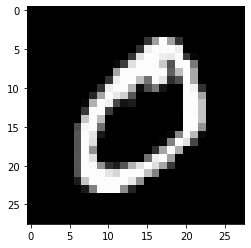

In [7]:
plt.imshow(train_images[1],cmap='gray')
plt.show()

In [21]:
wandb.init(project="new-demo-project")
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(784,activation='relu'))
model.add(keras.layers.Dense(484,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [0]:
model.compile(optimizer=keras.optimizers.SGD(),loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [23]:
model.fit(train_images,train_labels,epochs=10,callbacks=[WandbCallback()])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.5440 - accuracy: 0.8642
Epoch 2/10
60000/60000 [==============================] - 16s 266us/sample - loss: 0.2647 - accuracy: 0.9250
Epoch 3/10
60000/60000 [==============================] - 16s 261us/sample - loss: 0.2128 - accuracy: 0.9399
Epoch 4/10
60000/60000 [==============================] - 16s 266us/sample - loss: 0.1781 - accuracy: 0.9504
Epoch 5/10
60000/60000 [==============================] - 16s 265us/sample - loss: 0.1532 - accuracy: 0.9568
Epoch 6/10
60000/60000 [==============================] - 16s 273us/sample - loss: 0.1339 - accuracy: 0.9621
Epoch 7/10
60000/60000 [==============================] - 16s 271us/sample - loss: 0.1184 - accuracy: 0.9669
Epoch 8/10
60000/60000 [==============================] - 16s 262us/sample - loss: 0.1061 - accuracy: 0.9703
Epoch 9/10
60000/60000 [==============================] - 16s 266us/sample - loss: 0.0955 - accuracy: 0.9

In [24]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 115us/sample - loss: 0.0957 - accuracy: 0.9707


[0.09565380976907908, 0.9707]